<a href="https://colab.research.google.com/github/Eupene/Regression-analysis/blob/main/Predicting_Water_Salinity_and_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#🌊 Project: CalCOFI - Oceanographic Time Series Analysis
##🌐 Overview
In this project, we dive into decades of oceanographic data from the California Cooperative Oceanic Fisheries Investigations (CalCOFI), a rich dataset spanning over 60 years. The goal? To explore the fascinating relationship between two critical oceanic variables: water salinity and temperature.

##📊 Dataset
Source: CalCOFI dataset
Duration: 1949 to present
Data Points: 50,000+ sampling stations, including variables like temperature, salinity, chlorophyll, and more.
##🎯 Objective
We aim to determine if there's a statistical relationship between water salinity and temperature by applying simple linear regression. Understanding this interaction can shed light on broader environmental dynamics and ocean health over time.

##🛠️ Methodology
####Data Preparation:
Import and clean the CalCOFI dataset.
###Exploratory Data Analysis (EDA):
Visualize trends and patterns in salinity and temperature.
###Regression Analysis:
Apply simple linear regression to test the hypothesis of a salinity-temperature relationship.
###Interpretation:
Evaluate the model’s output to assess the strength and significance of the correlation.
##📝 Conclusion
This analysis provides key insights into the dynamic interactions of ocean environments, informing ongoing marine research and conservation strategies.

##🧰 Tools Used
Environment: Google Colab

Libraries: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

In [6]:
# Import Libraries

# pandas: for data manipulation and analysis
import pandas as pd

# numpy: for numerical computations and handling arrays
import numpy as np

# matplotlib.pyplot: for data visualization (plotting graphs)
import matplotlib.pyplot as plt

# seaborn: for statistical data visualization (enhanced plots)
import seaborn as sns

# train_test_split: for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LinearRegression: for performing simple linear regression analysis
from sklearn.linear_model import LinearRegression

# preprocessing: for scaling and normalizing data
from sklearn import preprocessing

# svm: Support Vector Machine, included for potential advanced analysis
from sklearn import svm

# Import the statsmodels library for statistical modeling and hypothesis testing
import statsmodels.api as sm

from sklearn.metrics import r2_score

In [8]:
# Load the dataset from a CSV file located in Google Drive
df = pd.read_csv('/content/drive/MyDrive/calcofi/archive.zip (Unzipped Files)/bottle.csv')

# Select only the relevant columns for analysis: 'Salnty' (Salinity) and 'T_degC' (Temperature)
df_bin = df[['Salnty', 'T_degC']]

# Rename the selected columns to shorter labels: 'sal' for salinity and 'temp' for temperature
df_bin.columns = ['sal', 'temp']

# Handle missing values in the dataset/data preprocessing
df_bin.fillna(method='ffill', inplace=True)  # Forward fill missing values (propagate the last valid observation forward)
df_bin.fillna(method='bfill', inplace=True)  # Backward fill missing values (propagate the next valid observation backward)
df_bin.dropna(inplace=True)  # Drop any remaining rows with missing values

# Display the first few rows of the selected and renamed data
df_bin

<ipython-input-8-84241c27d0d8>:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/calcofi/archive.zip (Unzipped Files)/bottle.csv')
<ipython-input-8-84241c27d0d8>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bin.fillna(method='ffill', inplace=True)  # Forward fill missing values (propagate the last valid observation forward)
<ipython-input-8-84241c27d0d8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.fillna(method='ffill', inplace=True)  # Forward fill missing values (propagate the last valid observation forward)
<ipython-input-8-84241c27d0d8>:12: FutureWarning: DataFrame.fillna with 'method' is 

,sal,temp
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


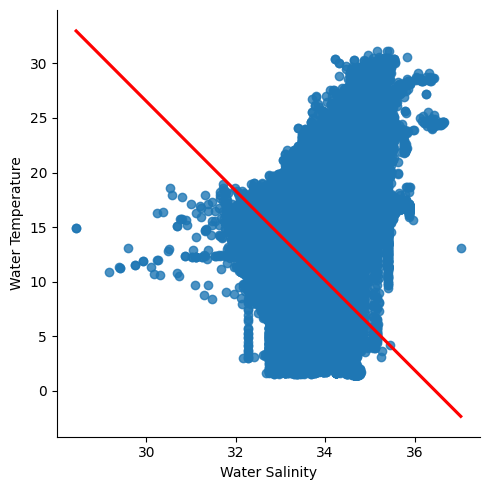

In [18]:
# Plot a linear regression line between 'sal' (salinity) and 'temp' (temperature) using seaborn
# This creates a scatterplot with a regression line to visually examine the relationship between salinity and temperature
sns.lmplot(x='sal', y='temp', data=df_bin, line_kws={'color': 'r'}) # Changed 'c' to 'line_kws' to specify the color of the regression line
plt.ylabel("Water Temperature")
plt.xlabel("Water Salinity")
# Display the plot
plt.show()

#Scatter Plot with Linear Regression Line
The plot created using sns.lmplot(x='sal', y='temp', data=df_bin) provides a visual representation of the relationship between water salinity (sal) and temperature (temp) from the CalCOFI dataset.

##Plot Elements:
Scatter Points:

Each point represents an individual observation in the dataset.
The x-axis corresponds to salinity, and the y-axis corresponds to temperature.

Regression Line:

The fitted line through the points shows the overall trend between the two variables.
A positive or negative slope indicates whether the relationship is direct or inverse.

Shaded Area:

Represents the confidence interval of the regression.
A wider interval suggests more uncertainty, while a narrower one suggests higher confidence in the relationship.

##Interpretation:
###Positive Relationship:
The line slopes upward, which implies that as salinity increases, temperature tends to increase.
###Trend Analysis:
This plot helps identify any linear relationship, giving a clearer understanding of oceanographic dynamics in the data.#

###Further analysis
To obtain a more precise understanding of the relationship between salinity and temperature, you should examine the regression coefficients and statistical measures as show below.

In [ ]:
# Prepare the data for regression
X = df_bin[['sal']]  # Predictor variable (salinity)
y = df_bin['temp']   # Response variable (temperature)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Extract the regression coefficients
coef = model.coef_[0]  # Coefficient for salinity
intercept = model.intercept_  # Intercept of the regression line

# Print the coefficients
print(f'Regression Coefficient: {coef}')
print(f'Intercept: {intercept}')

# To get more detailed statistical measures, use statsmodels
X_sm = sm.add_constant(X)  # Add a constant term for intercept
model_sm = sm.OLS(y, X_sm).fit()  # Fit the model

# Print the summary of the regression analysis
print(model_sm.summary())

Regression Coefficient: -4.101793710634732
Intercept: 149.58011013137627
                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                 2.220e+05
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:05:28   Log-Likelihood:            -2.3817e+06
No. Observations:              864863   AIC:                         4.763e+06
Df Residuals:                  864861   BIC:                         4.763e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

# **Detailed Explanation of Regression Results:**
1. Regression Coefficients
Intercept (149.58):

This is the predicted value of the dependent variable (temperature) when the independent variable (salinity) is zero. In practical terms, it represents the baseline temperature in the dataset when salinity has no effect. This is a theoretical value since salinity of zero might not be realistic in many contexts.

2. Coefficient for Salinity (-4.10):

This coefficient represents the change in the dependent variable (temperature) for each one-unit increase in the independent variable (salinity). A coefficient of -4.10 means that for every unit increase in salinity, the temperature decreases by approximately 4.10 units. This suggests an inverse relationship between salinity and temperature: as salinity increases, temperature tends to decrease.
3. Statistical Measures
R-squared (0.204):

This statistic measures how well the independent variable (salinity) explains the variability in the dependent variable (temperature). An R-squared value of 0.204 means that about 20.4% of the variation in temperature is explained by salinity. This is a relatively modest amount, suggesting that while there is some relationship, other factors not included in the model may also influence temperature.
4. Adjusted R-squared (0.204):

Meaning: This adjusts the R-squared value based on the number of predictors in the model. Since there is only one predictor in this model, the adjusted R-squared is the same as R-squared. It is useful when comparing models with different numbers of predictors.
5. F-statistic (2.220e+05):

The F-statistic tests whether the model as a whole is statistically significant. A very high F-statistic value (220,000) with a p-value of 0.00 indicates that the model is statistically significant, meaning that the relationship between salinity and temperature is unlikely to be due to chance.
6. Log-Likelihood (-2.3817e+06):

This value measures how well the model fits the data. It is a component of many model selection criteria, such as AIC and BIC. Lower log-likelihood values indicate a better fit of the model to the data.
7. AIC (Akaike Information Criterion, 4.763e+06):

AIC is used to compare models, taking into account both the goodness of fit and the number of parameters. Lower AIC values indicate a better model fit. In this case, it provides a measure of the model's relative quality compared to other models.
8. BIC (Bayesian Information Criterion, 4.763e+06):

Similar to AIC, BIC also considers model fit and the number of predictors but with a stronger penalty for models with more parameters. Lower BIC values indicate a more preferred model.
9. Coefficient Significance
Const (Intercept):

Std Err (0.295): The standard error of the intercept estimate. A smaller standard error indicates a more precise estimate.
t (507.751): The t-statistic for the intercept. It measures how many standard errors the estimate is away from zero. A high t-value suggests that the intercept is significantly different from zero.
P>|t| (0.000): The p-value associated with the t-statistic. A value of 0.000 indicates strong evidence against the null hypothesis (that the intercept is zero), meaning the intercept is statistically significant.
Sal (Salinity):

Std Err (0.009): The standard error of the salinity coefficient estimate. Smaller values indicate more precise estimates.
t (-471.165): The t-statistic for the salinity coefficient, showing how many standard errors the estimate is away from zero. A very high absolute value indicates strong significance.
P>|t| (0.000): The p-value for the salinity coefficient. A value of 0.000 indicates that the coefficient is statistically significant, meaning salinity significantly affects temperature.
10. Model Diagnostics
Omnibus (242119.026):

Meaning: Tests the normality of the residuals (errors). A high value indicates that the residuals are not normally distributed.
Durbin-Watson (0.207):

Meaning: Tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation, while values far from 2 (such as 0.207) suggest positive autocorrelation. This could imply that residuals are not independent.
Jarque-Bera (799501.098):

Meaning: Tests for skewness and kurtosis in the residuals. A high value suggests deviations from normality.
Skew (1.418):

Meaning: Measures the asymmetry of the residuals' distribution. Positive skew indicates that the residuals have a longer tail on the right side.
Kurtosis (6.761):

Meaning: Measures the "tailedness" of the residuals' distribution. High kurtosis indicates heavy tails and outliers.
11. Notes
Condition Number (2.44e+03):
Meaning: Indicates potential multicollinearity or numerical problems. A large condition number suggests that there may be issues with the data, such as highly correlated predictors or numerical instability.

# **Plot and Regression Results Alignment**

Scatter Points:

Plot: Each point represents an observation with specific salinity and temperature values.
Regression Analysis: The points show how temperature changes with salinity. The spread and clustering of these points around the regression line reflect the variability and pattern in the data.
Regression Line:

Plot: The fitted regression line shows the general trend of the relationship between salinity and temperature.
Regression Analysis: The negative slope of the regression line (coefficient of -4.10) indicates that as salinity increases, temperature decreases. The plot visually confirms this negative relationship by showing a downward slope from left to right.
Confidence Interval:

Plot: The shaded area around the regression line represents the confidence interval of the predictions.
Regression Analysis: A wide confidence interval around the regression line suggests uncertainty in the estimates, which aligns with the moderate R-squared value (0.204) indicating that only a portion of the temperature variation is explained by salinity.
Visual Pattern:

Plot: The general downward trend in the scatter plot and the regression line indicates a negative correlation between salinity and temperature.
Regression Analysis: The statistical results (negative coefficient) and the plot together reinforce the conclusion that there is a significant, albeit modest, negative relationship between these variables.

In [13]:
x = np.array(df_bin['sal']).reshape(-1, 1)  # Independent variable: Salinity
y = np.array(df_bin['temp']).reshape(-1, 1)  # Dependent variable: Temperature

# Split the data into training (80%) and testing sets (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

# Evaluate the model on the test set and print the R-squared score
print(model.score(x_test, y_test))  # R-squared score on test data

0.20285714260717924


#**Result**
The output value 0.20285714260717924 is the R-squared score for the linear regression model when tested on the unseen test data. Here's what it means:

##R-squared Score (0.2029):

The R-squared value represents the proportion of the variance in the dependent variable (temperature) that can be explained by the independent variable (salinity).
An R-squared value of 0.2029 indicates that approximately 20.29% of the variation in temperature can be explained by salinity based on this linear regression model.

##Model Interpretation:

While there is some relationship between salinity and temperature, as indicated by the score, the relationship is relatively weak. This means that other factors besides salinity are likely influencing temperature changes.
A low R-squared score like this suggests that a simple linear regression might not fully capture the complexity of the relationship between these two variables. Other modeling techniques (e.g., polynomial regression or including additional variables) may better explain the variability in the data.

##Practical Implication:

This R-squared score reflects that salinity alone is not a strong predictor of temperature in the dataset, though there is some degree of correlation. Further analysis might involve exploring additional features or nonlinear models to improve predictive power.

In [14]:
#df_bin_500 =df_bin[:][:500]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_scaled, y_train)

print(model_ridge.score(x_test, y_test))

-234.72933607213707


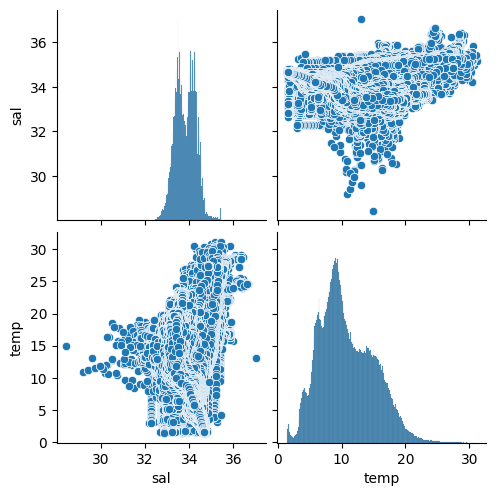

In [20]:
sns.pairplot(df_bin)